In [1]:
#import tensorflow as tf
#gpus = tf.config.experimental.list_physical_devices('GPU')
#if gpus:
#    try:
#        for gpu in gpus:
#            tf.config.experimental.set_memory_growth(gpu, True)#

#    except RuntimeError as e:
#        print(e)
        


In [2]:
print("Kernel Loaded!")

Kernel Loaded!


In [3]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [4]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2020/2/14 for Nair & Abraham 2010

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Total model number = (nmodle0) * nmodel

#iset=int(input('Input the total number of sets of models '))
#nmodel0=int(input('Input the total number of images per model'))
#nmodel=nmodel0*iset
nmodel=2000
print('nmodel',nmodel)

### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
batch_size = 100
#num_classes = 5
num_classes = 2
epochs = 10
nb_epoch=epochs
n_mesh=50
#nmodel=1000
print('nmodel',nmodel)
print('num_classes',num_classes)

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh


print(img_rows, img_cols, n_mesh2)
#stop



#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)
print(input_shape)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
#print(y_test.shape[0], 'y.test samples')
#print(str(y_test[0]))
#print(str(y_test[1]))
#print(str(y_test[2]))

#y_train = y_train.astype('int32')
#y_test = y_test.astype('int32')
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

nmodel 2000
nmodel 2000
num_classes 2
50 50 2499
(50, 50, 1)


In [5]:
def old():
    # This is for simlation data sets
    GD_W_DISC_PATH = "../generated_data/data3/"
    GD_WO_DISC_PATH = "../generated_data/data4/"

    GD_FN = "2dft.dat"
    DATA_PART_NMODEL = int(nmodel/2)


    def load_data(path, filename):
        return np.genfromtxt(os.path.join(path, filename), autostrip=True, max_rows=DATA_PART_NMODEL*n_mesh3)

    x_dataset_wd = load_data(GD_W_DISC_PATH, GD_FN)
    y_dataset_wd = np.ones((DATA_PART_NMODEL, 1), np.int)

    x_dataset_wod = load_data(GD_WO_DISC_PATH, GD_FN)
    y_dataset_wod = np.zeros((DATA_PART_NMODEL, 1), np.int)

    x_dataset = np.append(x_dataset_wd, x_dataset_wod, axis=0)
    y_dataset = np.append(y_dataset_wd, y_dataset_wod, axis=0)

    np.savetxt("2dft.dat", x_dataset, '%1.8f')
    np.savetxt("2dftn.dat", y_dataset, '%d')

    x_dataset = x_dataset.reshape(nmodel, img_rows, img_cols, 1)
    print(x_dataset.shape)
    print(y_dataset.shape)

In [6]:
%run ../data_preparation/FILE_IO_FUNCTIONS.ipynb
x_dataset, y_dataset = load_total_combined_data()
nmodel = y_dataset.shape[0]
input_shape = x_dataset[0].shape

In [7]:
def new_old():
    %run ../data_preparation/FILE_IO_FUNCTIONS.ipynb
    nmodel_part = int(nmodel/2)
    x_dataset_wd = load_data(data="DATA3", count=nmodel_part)
    x_dataset_wod = load_data(data="DATA4", count=nmodel_part)

    y_dataset_wd = np.ones((x_dataset_wd.shape[0], 1), np.int)
    y_dataset_wod = np.zeros((x_dataset_wod.shape[0], 1), np.int)

    x_dataset = np.append(x_dataset_wd, x_dataset_wod, axis=0)
    y_dataset = np.append(y_dataset_wd, y_dataset_wod, axis=0)

In [8]:
%run ../data_preparation/PRE_PROCESSING.ipynb
add_gaussian_noise(x_dataset)
add_point_sources(x_dataset)

print(x_dataset.shape)
print(y_dataset.shape)

unique, counts = np.unique(y_dataset, return_counts=True)
print(np.asarray((unique, counts)).T)

(36000, 50, 50, 1)
(36000,)
[[    0 18000]
 [    1 18000]]


float64
(50, 50, 1)


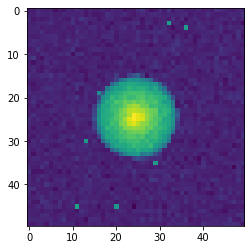

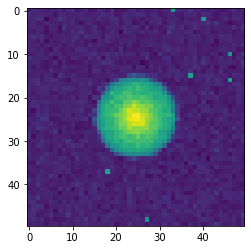

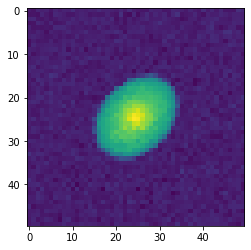

In [9]:
from matplotlib import image
from matplotlib import pyplot

# summarize shape of the pixel array
print(x_dataset[0].dtype)
print(x_dataset[0].shape)
# display the array of pixels as an image
pyplot.imshow(x_dataset[0])
pyplot.show()
pyplot.imshow(x_dataset[1])
pyplot.show()
pyplot.imshow(x_dataset[2])
pyplot.show()

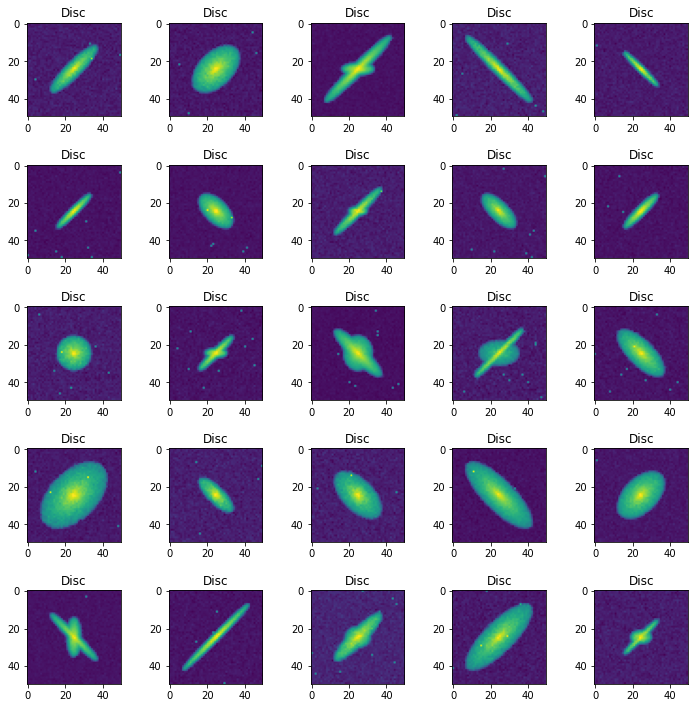

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72
%run .\plotting_helpers.ipynb
plot_classification_results(images=x_dataset, y_preds=y_dataset, y_labels=("No Disc", "Disc"), random_sample=True)

In [11]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_dataset, y_dataset, train_size=0.8, random_state=1)

In [12]:
#x_train = x_dataset; x_test = x_train; y_train = y_dataset; y_test = y_train

In [13]:
np.savetxt("2dfv_test_split.dat", x_test.flatten())
np.savetxt("2dftn_test_split.dat", y_test, '%d')

In [14]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [15]:
#stop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


print('save the architecture of a model')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Train on 28800 samples, validate on 7200 samples
Epoch 1/10
28800/28800 [==============================] - 10s 354us/step - loss: 0.5160 - acc: 0.7004 - val_loss: 0.3734 - val_acc: 0.7874
Epoch 2/10
28800/28800 [==============================] - 7s 255us/step - loss: 0.3391 - acc: 0.8224 - val_loss: 0.2629 - val_acc: 0.8526
Epoch 3/10
28800/28800 [==============================] - 7s 258us/step - loss: 0.2194 - acc: 0.9047 - val_loss: 0.1404 - val_acc: 0.9469
Epoch 4/10
28800/28800 [==============================] - 7s 251us/step - loss: 0.1280 - acc: 0.9542 - val_loss: 0.0747 - val_acc: 0.9824
Epoch 5/10
28800/28800 [==============================] - 7s 252us/step - loss: 0.0742 - acc: 0.9765 - val_loss: 0.0500 - val_acc: 0.9842
Epoch 6/10
28800/28800 [==============================] - 7s 254us/step - loss: 0.0455 - acc: 0.9855 - val_loss: 0.0163 - val_acc: 0.9964
Epoch 7/10
28800/28800 [==============================] - 7s 257us/step - loss: 0.0279 - acc: 0.9918 - val_loss: 0.0100 - 

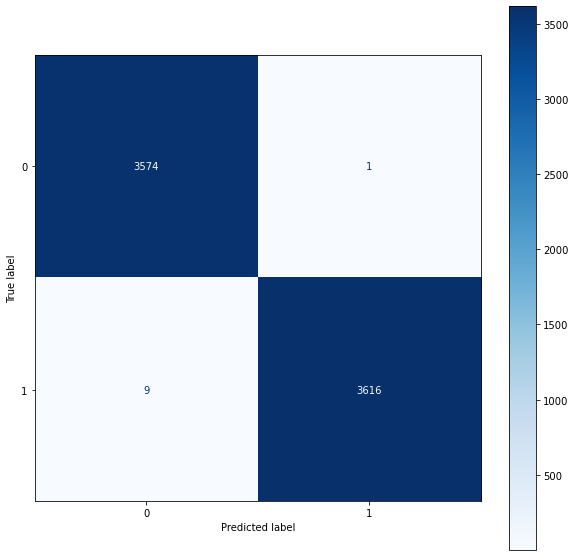

In [16]:
from sklearn import metrics

true_data = y_test
predicted_data = model.predict(x_test)
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_data.argmax(axis=1), predicted_data.argmax(axis=1))).plot(cmap='Blues')

float64
(50, 50, 1)


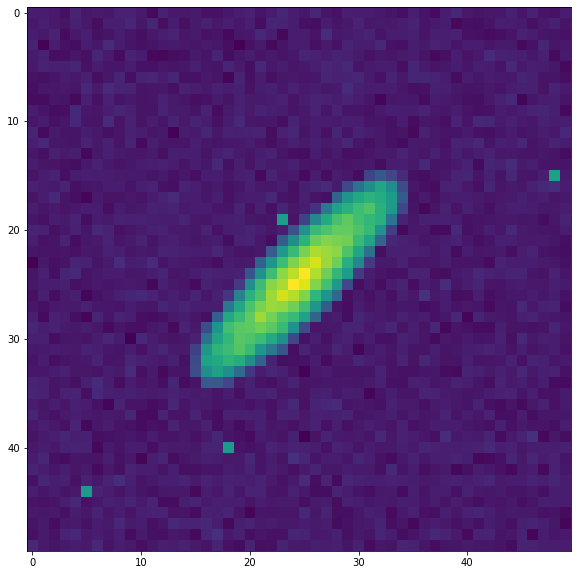

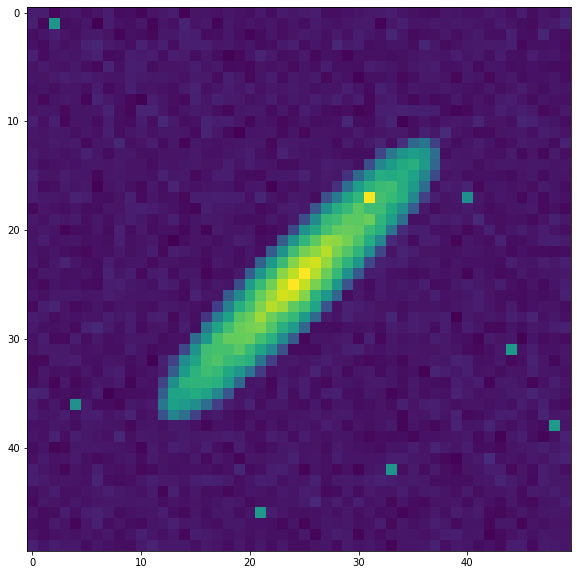

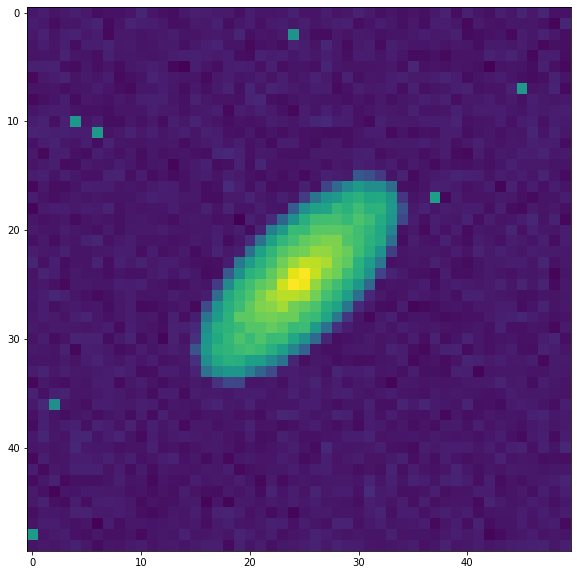

In [17]:
from matplotlib import image
from matplotlib import pyplot

# summarize shape of the pixel array
print(x_train[0].dtype)
print(x_train[0].shape)
# display the array of pixels as an image
pyplot.imshow(x_train[0])
pyplot.show()
pyplot.imshow(x_train[1])
pyplot.show()
pyplot.imshow(x_train[2])
pyplot.show()